# RNN LSTM on IMDB Dataset

To building an LSTM-based recurrent neural network (RNN) model for sentiment analysis on the IMDB dataset using Python and Keras, which is a popular deep learning library. Sentiment analysis involves classifying text as positive or negative based on its sentiment.

0 For Negative Review

1 For Positive Review

# Importing Libraries

Importing libraries is an essential step in any data analysis or machine learning project. These libraries provide various functions and tools to manipulate, visualize, and analyze data efficiently. Here are explanations of some popular data analysis libraries:

Pandas: Pandas is a powerful and widely used library for data manipulation and analysis. It provides data structures like DataFrames and Series, which allow you to store and manipulate tabular data. Pandas offers a wide range of functions for data cleaning, filtering, aggregation, merging, and more

NumPy: NumPy (Numerical Python) is a fundamental library for scientific computing in Python. It provides efficient data structures like arrays and matrices and a vast collection of mathematical functions. NumPy enables you to perform various numerical operations on large datasets, such as element-wise calculations, linear algebra, Fourier transforms, and random number generation

Matplotlib: Matplotlib is a popular plotting library that enables you to create a wide range of static, animated, and interactive visualizations. It provides a MATLAB-like interface and supports various types of plots, including line plots, scatter plots, bar plots, histograms, and more

TensorFlow is an open-source deep learning framework developed by Google. It provides a comprehensive ecosystem of tools, libraries, and resources for building and deploying machine learning models. TensorFlow is widely used in various domains, including computer vision, natural language processing, and reinforcement learning

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Importing Dataset From keras.datasets

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Splitting Dataset

Dataset splitting is an important step in machine learning and data analysis. It involves dividing a dataset into two or more subsets to train and evaluate a model effectively. The most common type of dataset splitting is into training and testing subsets.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 20000)

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [5]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [6]:
x_test

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 18142, 10698, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 15387, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 10626, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 16873, 19, 861, 1074, 5, 1987, 17975, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378,

In [8]:
x_train = pad_sequences(x_train, maxlen = 100)
x_test = pad_sequences(x_test, maxlen = 100)

In [9]:
x_train

array([[1415,   33,    6, ...,   19,  178,   32],
       [ 163,   11, 3215, ...,   16,  145,   95],
       [1301,    4, 1873, ...,    7,  129,  113],
       ...,
       [  11,    6, 4065, ...,    4, 3586,    2],
       [ 100, 2198,    8, ...,   12,    9,   23],
       [  78, 1099,   17, ...,  204,  131,    9]])

In [10]:
x_test

array([[   0,    0,    0, ...,   14,    6,  717],
       [   6,  976, 2078, ...,  125,    4, 3077],
       [   4, 5673,    7, ...,    9,   57,  975],
       ...,
       [   0,    0,    0, ...,   21,  846, 5518],
       [   0,    1,   11, ..., 2302,    7,  470],
       [  56,   96,  346, ...,   34, 2005, 2643]])

In [11]:
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

# Building Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
model = Sequential()

model.add(Embedding(input_dim=20000, output_dim=128, input_shape=(100,)))

model.add(LSTM(128, activation = 'tanh'))

model.add(Dense(1, activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


# Compiling Model

Compiling the model in deep learning involves configuring essential components that define how the model will be trained.

In [17]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

Early stopping is a technique used in machine learning to prevent overfitting and improve the generalization ability of a model. It involves monitoring the performance of a model during training and stopping the training process when the performance on a validation set starts to deteriorate.

In [19]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3)

# Training Model

Training the model in deep learning involves the process of iteratively updating the model's parameters (weights and biases) based on the provided training data to minimize the loss function and improve the model's performance.

In [21]:
model.fit(x_train, y_train,
          batch_size = 128, 
          epochs = 20, 
          validation_data = (x_test, y_test), 
          callbacks = [early_stop])

Epoch 1/20
196/196 [==============================] - 268s 1s/step - loss: 0.4677 - accuracy: 0.7822 - val_loss: 0.3464 - val_accuracy: 0.8510
Epoch 2/20
196/196 [==============================] - 232s 1s/step - loss: 0.2911 - accuracy: 0.8836 - val_loss: 0.3475 - val_accuracy: 0.8507
Epoch 3/20
196/196 [==============================] - 243s 1s/step - loss: 0.2269 - accuracy: 0.9131 - val_loss: 0.3481 - val_accuracy: 0.8557
Epoch 4/20
196/196 [==============================] - 275s 1s/step - loss: 0.1880 - accuracy: 0.9293 - val_loss: 0.4014 - val_accuracy: 0.8403


In [22]:
model.save('LSTM_model_for_IMDB.h5')

# Learning Curve

A learning curve is a graphical representation that shows how the performance of a machine learning model improves or stabilizes as the amount of training data increases. It is a useful tool for evaluating the effectiveness of a model and understanding its behavior.

In [23]:
loss = pd.DataFrame(model.history.history)

In [24]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.467717,0.78216,0.346375,0.85096
1,0.291071,0.88356,0.347521,0.85072
2,0.226876,0.91308,0.348080,0.85568
3,0.187981,0.92932,0.401414,0.84028


<AxesSubplot:>

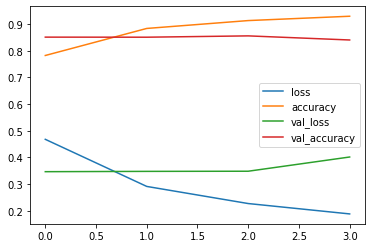

In [25]:
loss.plot()

<AxesSubplot:>

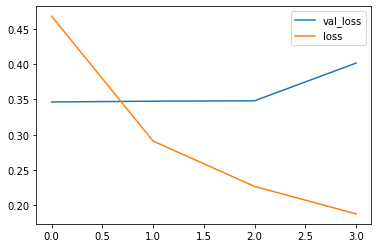

In [26]:
loss[['val_loss', 'loss']].plot()

<AxesSubplot:>

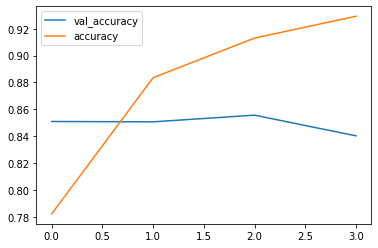

In [27]:
loss[['val_accuracy', 'accuracy']].plot()

# Prediction 

In [28]:
y_pred = model.predict(x_test)

782/782 [==============================] - 51s 64ms/step


In [31]:
print(y_test[5]), print(y_pred[5])

1
[0.9828632]


(None, None)

In [32]:
print(y_test[50]), print(y_pred[50])

0
[0.06062628]


(None, None)